# Object based simulation - variable disk radius

This notebook replicates the notebook `object_based_sim01` but with a variable disk radius, following a Gaussian distribution. See that notebook for more details.

Import the required modules

In [1]:
import numpy as np
import matplotlib.pylab as pl

Define the grid and the number of objects.

In [2]:
# Number of objects
nb_obj = 10

# Grid definition
nx = 300
ny = 200
ox = 0.0
oy = 0.0
dx = 1.0
dy = 1.0
# Coordinates of the grid nodes
x, y = np.meshgrid(np.arange(oy,ny*dy,dy), np.arange(ox,nx*dx,dx))

Define the canvas to store the results of the simulation.

In [3]:
sim = np.zeros((nx, ny))

Randomly place the centers of the disks

In [4]:
np.random.seed(45137)
x_obj = np.random.uniform(x.min(), x.max(), nb_obj)
y_obj = np.random.uniform(y.min(), y.max(), nb_obj)

## Variable radius

Hereinafter the only difference from the notebook `object_based_sim01`, that is a radius `r` variable for each disk, following a Gaussian distribution with parameters 10 and 2.

In [5]:
r = np.random.normal(10, 2, nb_obj)

## Simulation

Note now that `r` is an array, therefore  we use  `r[i]` in place of `r` in the `for` loop

In [6]:
for i in range(nb_obj):
    # Step 1 (compute distance from the disk center)
    dist = np.hypot(x-x_obj[i],y-y_obj[i])
    # Step 2 (check where distance < disk radius)
    # NOTE: now `r` is an array too
    mask = np.where(dist < r[i])
    # Step 3 (set the grid points inside the disk = 1)
    sim[mask] = 1

## Plot

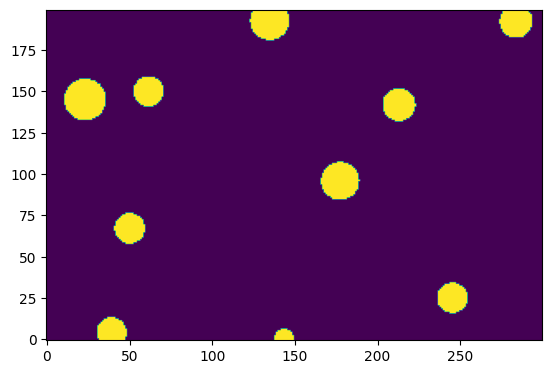

In [7]:
pl.imshow(sim.T, origin="lower")
pl.show()

Now the radius of all the disks varies according to a Gaussian distribution.

## Concluding remarks

Note that in cases of more complex shapes (objects, or "geobodies"), for example in the case of channels in a fluvial environment, one can have statistical distributions of channel width, height, sinuosity, etc, extracted from the information contained in lithological logs, geophysical surveys, analog environments, and so on.